In [12]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

col_Names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']
df_heart = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning\
-databases/heart-disease/processed.cleveland.data',\
names=col_Names)
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [13]:
import numpy as np
df_heart.replace('?', np.nan, inplace=True)
df_heart=df_heart.dropna()
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_heart, test_size=0.3, random_state=0, stratify=df_heart['label'])
train_X = train[train.columns[:13]]
train_Y = train[train.columns[13:]]
test_X = test[test.columns[:13]]
test_Y = test[test.columns[13:]]

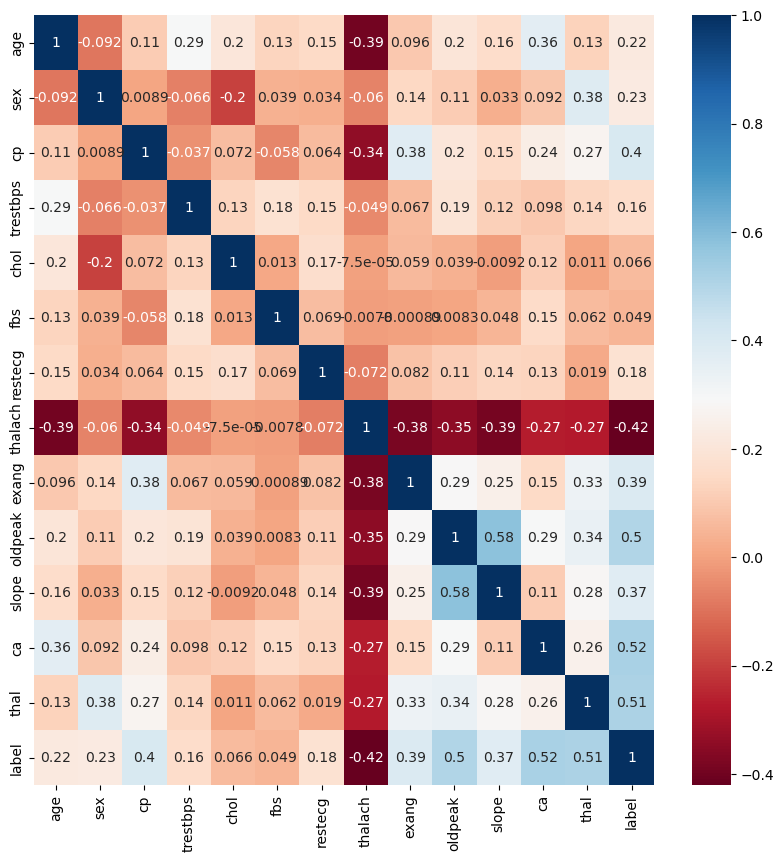

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_heart.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True)
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier(n_estimators=10)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Random Forest 알고리즘 분류 정확도:', accuracy_score(pred_RF,test_Y))
print(classification_report(pred_RF,test_Y))

Random Forest 알고리즘 분류 정확도: 0.5777777777777777
              precision    recall  f1-score   support

           0       0.90      0.73      0.80        59
           1       0.25      0.21      0.23        19
           2       0.18      0.33      0.24         6
           3       0.27      0.50      0.35         6
           4       0.00      0.00      0.00         0

    accuracy                           0.58        90
   macro avg       0.32      0.35      0.32        90
weighted avg       0.67      0.58      0.61        90



In [18]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
pred_SVM = model.predict(test_X)
print('SVM 알고리즘 분류 정확도:', accuracy_score(pred_SVM, test_Y))
print(classification_report(pred_SVM, test_Y))

SVM 알고리즘 분류 정확도: 0.5555555555555556
              precision    recall  f1-score   support

           0       0.94      0.73      0.82        62
           1       0.12      0.15      0.14        13
           2       0.27      0.27      0.27        11
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0

    accuracy                           0.56        90
   macro avg       0.27      0.23      0.25        90
weighted avg       0.70      0.56      0.62        90



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#학습하기
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
#테스트와 평가하기
pred_knn = model.predict(test_X)
print('KNN 알고리즘 분류 정확도:', metrics.accuracy_score(pred_knn, test_Y))

KNN 알고리즘 분류 정확도: 0.4666666666666667


(array([160.,  54.,  35.,  48.]),
 array([0., 1., 2., 3., 4.]),
 <BarContainer object of 4 artists>)

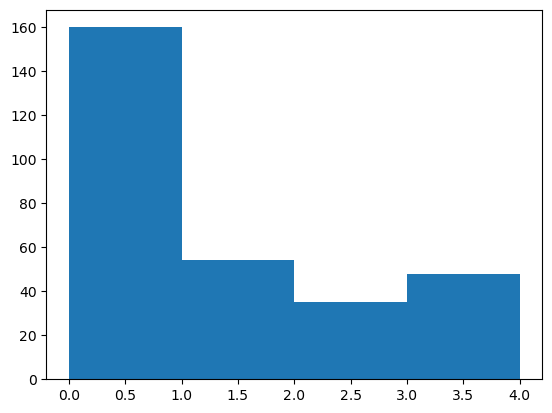

In [20]:
import matplotlib.pyplot as plt
plt.hist(df_heart.label, bins=4)

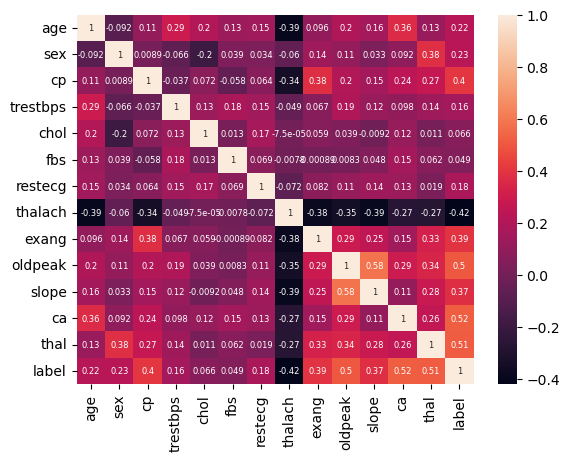

In [21]:
import seaborn as sns
ax = sns.heatmap(df_heart.corr(), annot=True, annot_kws={"size":6})
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier(n_estimators=100, max_depth=10)
model.fit(train_X, train_Y)
pred_RF = model.predict(test_X)
print('랜덤 포레스트 알고리즘 예측 정확도:', metrics.accuracy_score(pred_RF, test_Y))

랜덤 포레스트 알고리즘 예측 정확도: 0.6333333333333333
